In [23]:
from MagicCube import MagicCube
import matplotlib.pyplot as plt


In [24]:
from algos.HillClimbing import HillClimbing

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time

def test_different_alphas(
        algorithm_class,
        algorithm_method='steepest_ascent',
        algorithm_params={},
        alphas=[0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
        n_trials=5,
        cube_size=5
):
    results = []

    for i, test_alpha in enumerate(alphas):

        print( f" Testing Alpha = {test_alpha} | ")

        trial_results = []
        for trial in range(n_trials):
            print(f"  Trial {trial + 1}/{n_trials}", end='\r')

        
            cube = MagicCube(alpha=test_alpha)
            algo = algorithm_class(cube_size=cube_size, **algorithm_params)

            initial_value = cube.calculate_objective_function()

            method = getattr(algo, algorithm_method)
            final_cube, history = method(cube)
            final_value = final_cube.calculate_objective_function()

            trial_results.append({
                'initial_value': initial_value,
                'final_value': final_value,
                'improvement': initial_value-final_value,
                'history': history,
                'trial': trial
            })

        results.append({
            'alpha': test_alpha,
            'trials': trial_results
        })
        print()  

    return results

def plot_alpha_results(results, algorithm_name):
    """Plot results from alpha testing"""
    # Box plot
    plt.figure(figsize=(12, 6))
    improvements = [[trial['improvement'] for trial in r['trials']] for r in results]
    alphas = [r['alpha'] for r in results]

    plt.boxplot(improvements, labels=[f"{alpha:.3f}" for alpha in alphas])
    plt.xlabel('Alpha Value')
    plt.ylabel('Improvement (Initial - Final Objective Value)')
    plt.title(f'Improvements Distribution for Different Alphas\n{algorithm_name}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Convergence plot for best alpha
    best_alpha_idx = np.argmax([np.mean(imp) for imp in improvements])
    best_alpha = alphas[best_alpha_idx]

    plt.figure(figsize=(10, 6))
    for trial in results[best_alpha_idx]['trials']:
        plt.plot(trial['history'], alpha=0.5, label=f'Trial {trial["trial"]+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.title(f'Convergence History for Best Alpha ({best_alpha:.3f})\n{algorithm_name}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print statistics
    print(f"\nStatistics for {algorithm_name}:")
    for i, alpha in enumerate(alphas):
        avg_improvement = np.mean(improvements[i])
        std_improvement = np.std(improvements[i])
        print(f"Alpha {alpha:.3f}: {avg_improvement:.2f} ± {std_improvement:.2f}")

    print(f"\nBest alpha: {best_alpha:.3f}")


In [26]:
import time
import matplotlib.pyplot as plt

def plot_3d_cube_state(cube_state, title="Cube State"):
    n = cube_state.shape[0]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each point in the cube
    for x in range(n):
        for y in range(n):
            for z in range(n):
                # Use color to represent the value in each cell
                ax.scatter(x, y, z, color=plt.cm.viridis(cube_state[x, y, z] / (n ** 3)), s=50)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

    # Display the plot, which will be rotatable in interactive mode
    plt.show()

def run_algorithm_test(algorithm_class, algorithm_method, alpha_val,algorithm_params={}, n_trials=3, cube_size=5):
    results = []

    for trial in range(n_trials):
        print(f"Trial {trial + 1}/{n_trials}")

   
        cube = MagicCube(size=cube_size,alpha=alpha_val)
        algo = algorithm_class(cube_size=cube_size, **algorithm_params)


        initial_state = cube.cube.copy()
        initial_objective_value = cube.calculate_objective_function()

        # plot_3d_cube_state(initial_state, title=f"Initial Cube State - Trial {trial + 1}")

       
        method = getattr(algo, algorithm_method)
        start_time = time.time()
        final_cube, history = method(cube)
        end_time = time.time()

    
        final_state = final_cube.cube.copy()
        final_objective_value = final_cube.calculate_objective_function()

        duration = end_time - start_time
        results.append({
            'initial_state': initial_state,
            'final_state': final_state,
            'initial_objective_value': initial_objective_value,
            'final_objective_value': final_objective_value,
            'history': history,
            'duration': duration
        })

        # plot_3d_cube_state(final_state, title=f"Final Cube State - Trial {trial + 1}")
        
        plt.plot(history, label=f'Trial {trial + 1}')

    # Plot formatting
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.title(f'Objective Function Over Iterations ({algorithm_method})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    for idx, result in enumerate(results):
        print(f"Trial {idx + 1}:")
        print(f"  Initial Objective Value: {result['initial_objective_value']}")
        print(f"  Final Objective Value: {result['final_objective_value']}")
        print(f"  Duration: {result['duration']:.4f} seconds")
        print()

    return results

<h1>Steepest Ascent Hill Climb</h1>

<h3>Steepest Ascent Hill Climb : Alpha Tuning</h3>

In [27]:
results = test_different_alphas(
    algorithm_class=HillClimbing,
    algorithm_method='steepest_ascent',
    alphas= np.arange(0, 1.05, 0.05)  # Wide range
)


 Testing Alpha = 0.0 | 
  Trial 5/5
 Testing Alpha = 0.05 | 
  Trial 5/5
 Testing Alpha = 0.1 | 
  Trial 5/5
 Testing Alpha = 0.15000000000000002 | 
  Trial 5/5
 Testing Alpha = 0.2 | 
  Trial 5/5
 Testing Alpha = 0.25 | 
  Trial 5/5
 Testing Alpha = 0.30000000000000004 | 
  Trial 5/5
 Testing Alpha = 0.35000000000000003 | 
  Trial 5/5
 Testing Alpha = 0.4 | 
  Trial 5/5
 Testing Alpha = 0.45 | 
  Trial 5/5
 Testing Alpha = 0.5 | 
  Trial 5/5
 Testing Alpha = 0.55 | 
  Trial 5/5
 Testing Alpha = 0.6000000000000001 | 
  Trial 5/5
 Testing Alpha = 0.65 | 
  Trial 5/5
 Testing Alpha = 0.7000000000000001 | 
  Trial 5/5
 Testing Alpha = 0.75 | 
  Trial 5/5
 Testing Alpha = 0.8 | 
  Trial 5/5
 Testing Alpha = 0.8500000000000001 | 
  Trial 5/5
 Testing Alpha = 0.9 | 
  Trial 5/5
 Testing Alpha = 0.9500000000000001 | 
  Trial 5/5
 Testing Alpha = 1.0 | 
  Trial 5/5


/var/folders/z0/2yq80mdn1817mx4m3km60fjm0000gn/T/ipykernel_16069/4074754816.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(improvements, labels=[f"{alpha:.3f}" for alpha in alphas])


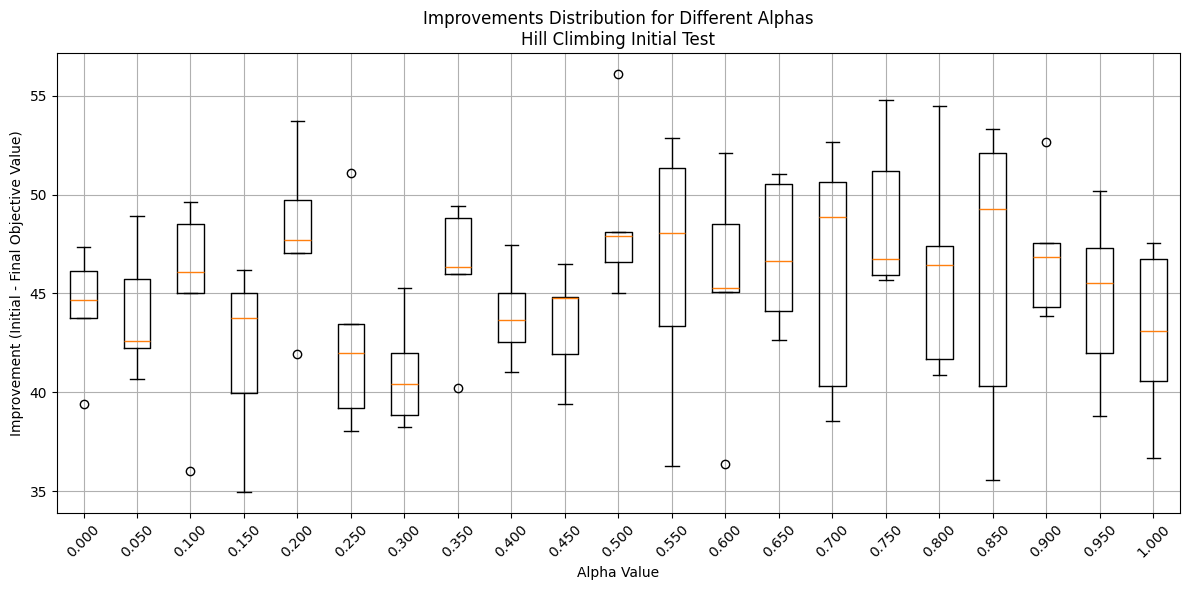

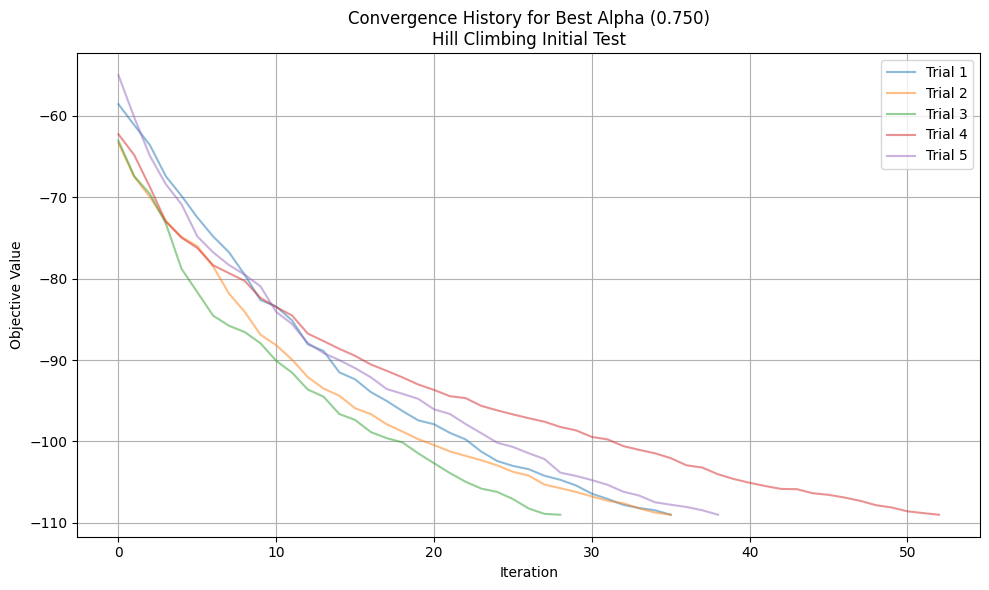


Statistics for Hill Climbing Initial Test:
Alpha 0.000: 44.26 ± 2.72
Alpha 0.050: 44.03 ± 2.94
Alpha 0.100: 45.06 ± 4.81
Alpha 0.150: 41.98 ± 4.09
Alpha 0.200: 48.03 ± 3.82
Alpha 0.250: 42.76 ± 4.59
Alpha 0.300: 40.96 ± 2.53
Alpha 0.350: 46.15 ± 3.26
Alpha 0.400: 43.94 ± 2.20
Alpha 0.450: 43.48 ± 2.50
Alpha 0.500: 48.75 ± 3.84
Alpha 0.550: 46.39 ± 6.02
Alpha 0.600: 45.48 ± 5.22
Alpha 0.650: 47.00 ± 3.36
Alpha 0.700: 46.22 ± 5.70
Alpha 0.750: 48.87 ± 3.56
Alpha 0.800: 46.18 ± 4.88
Alpha 0.850: 46.10 ± 6.97
Alpha 0.900: 47.05 ± 3.14
Alpha 0.950: 44.77 ± 3.99
Alpha 1.000: 42.93 ± 4.01

Best alpha: 0.750


In [28]:
plot_alpha_results(results, "Hill Climbing Initial Test")

<h3>Steepest Ascent HillClimb : Testing</h3> 

Trial 1/3
Trial 2/3
Trial 3/3


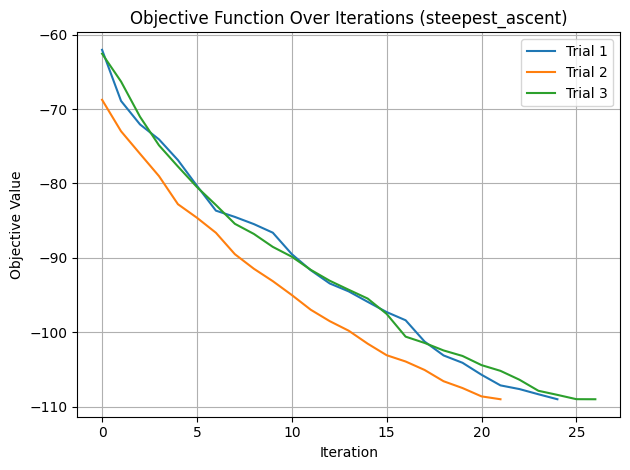

Trial 1:
  Initial Objective Value: -62.03669724770642
  Final Objective Value: -109
  Duration: 1.4782 seconds

Trial 2:
  Initial Objective Value: -68.75229357798165
  Final Objective Value: -109
  Duration: 1.2841 seconds

Trial 3:
  Initial Objective Value: -62.559633027522935
  Final Objective Value: -109
  Duration: 1.6627 seconds



In [29]:
results = run_algorithm_test(HillClimbing, 'steepest_ascent',alpha_val=0.55,algorithm_params={'max_iterations':100}, n_trials=3, cube_size=5)